<span style='font-size:24px; display:block;'>
Download data from database (influxdb)
</span>

<span style='font-size:40px; display:block;'>    
<b>Download all variables of specific measurements</b></br>    
</span>

---
**Author**: Lukas Hörtnagl  
**Last update**: 19 Mar 2025

# **Imports**

In [1]:
import warnings
from datetime import datetime
import dbc_influxdb as dbc
warnings.simplefilter("ignore")

</br>

# **Connect to database**

In [2]:
# Folder with database configurations
DIRCONF = r'L:\Sync\luhk_work\20 - CODING\22 - POET\configs'  
# Instantiate class
dbc = dbc.dbcInflux(dirconf=DIRCONF)

Reading configuration files was successful.
Connection to database works.


</br>

# **Download from database**
- For example: all air temperature and all short-wave radiation variables from data versions `meteoscreening_diive` and `meteoscreening_mst`

In [3]:
# Settings
SITE = 'ch-dav'  # Site name
BUCKET = f'{SITE}_processed'
DATA_VERSION = ['meteoscreening_diive', 'meteoscreening_mst']  # Multiple data versions possible
DIRCONF = r'L:\Sync\luhk_work\20 - CODING\22 - POET\configs'  # Folder with configurations
MEASUREMENTS = ['SW', 'TA']  # Measurement name
FIELDS = None  # None means download all fields from measurements, in the sense of "no specific fields"
START = '2024-06-01 00:00:01'  # Download data starting with this date
STOP = '2024-06-03 00:00:01'  # Download data before this date (the stop date itself is not included)
TIMEZONE_OFFSET_TO_UTC_HOURS = 1  # Timezone, e.g. "1" is translated to timezone "UTC+01:00" (CET, winter time)

# Data download
data_simple, data_detailed, assigned_measurements = \
    dbc.download(
        bucket=BUCKET,
        measurements=MEASUREMENTS,
        fields=FIELDS,
        start=START,
        stop=STOP,
        timezone_offset_to_utc_hours=TIMEZONE_OFFSET_TO_UTC_HOURS,
        data_version=DATA_VERSION
)


DOWNLOADING
    from bucket ch-dav_processed
    variables ALL
    from measurements ['SW', 'TA']
    from data version ['meteoscreening_diive', 'meteoscreening_mst']
    between 2024-06-01 00:00:01 and 2024-06-03 00:00:01
    with timezone offset to UTC of 1
Using querystring:
from(bucket: "ch-dav_processed") |> range(start: 2024-06-01T00:00:01+01:00, stop: 2024-06-03T00:00:01+01:00) |> filter(fn: (r) => r["_measurement"] == "SW" or r["_measurement"] == "TA") |> filter(fn: (r) => r["data_version"] == "meteoscreening_diive" or r["data_version"] == "meteoscreening_mst")  |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
Used querystring: from(bucket: "ch-dav_processed") |> range(start: 2024-06-01T00:00:01+01:00, stop: 2024-06-03T00:00:01+01:00) |> filter(fn: (r) => r["_measurement"] == "SW" or r["_measurement"] == "TA") |> filter(fn: (r) => r["data_version"] == "meteoscreening_diive" or r["data_version"] == "meteoscreening_mst")  |> pivot(rowKey:["_time"], column

</br>

# **Plot downloaded data**

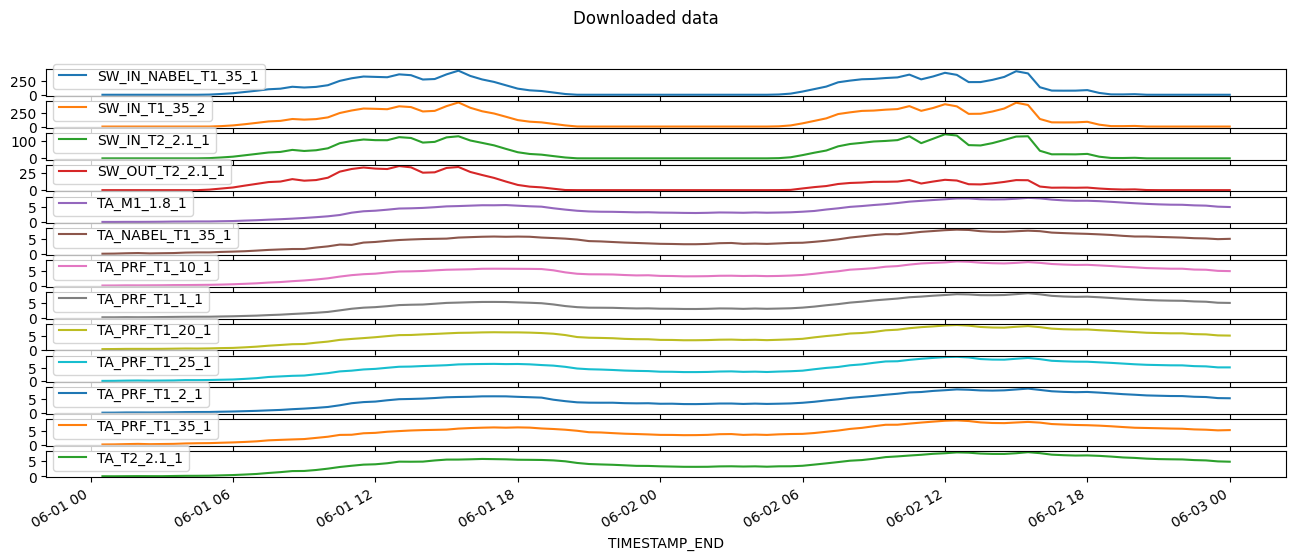

In [8]:
data_simple.plot(x_compat=True, figsize=(16, 6), title="Downloaded data", subplots=True);

</br>

# **Save to file**

In [7]:
data_simple

,SW_IN_NABEL_T1_35_1,SW_IN_T1_35_2,SW_IN_T2_2.1_1,SW_OUT_T2_2.1_1,TA_M1_1.8_1,TA_NABEL_T1_35_1,TA_PRF_T1_10_1,TA_PRF_T1_1_1,TA_PRF_T1_20_1,TA_PRF_T1_25_1,TA_PRF_T1_2_1,TA_PRF_T1_35_1,TA_T2_2.1_1
TIMESTAMP_END,,,,,,,,,,,,,
2024-06-01 00:30:00,0.0,0.0,0.0,0.0,0.104667,-0.056667,0.174817,0.258456,0.281600,0.192978,0.158528,0.053472,0.077950
2024-06-01 01:00:00,0.0,0.0,0.0,0.0,0.102333,-0.016667,0.185922,0.254239,0.303172,0.218394,0.173517,0.086894,0.068839
2024-06-01 01:30:00,0.0,0.0,0.0,0.0,0.124667,0.103333,0.233567,0.297683,0.357289,0.291444,0.231622,0.183439,0.098983
2024-06-01 02:00:00,0.0,0.0,0.0,0.0,0.119333,0.183333,0.222994,0.271572,0.363972,0.332472,0.236622,0.262122,0.119450
2024-06-01 02:30:00,0.0,0.0,0.0,0.0,0.139667,0.053333,0.244728,0.300711,0.357372,0.280461,0.227211,0.160233,0.106106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-02 22:00:00,0.0,0.0,0.0,0.0,5.735185,5.576667,5.818861,5.916744,5.900356,5.796372,5.843861,5.691250,5.633461
2024-06-02 22:30:00,0.0,0.0,0.0,0.0,5.544815,5.366667,5.536994,5.697356,5.608844,5.522339,5.605489,5.453744,5.419089
2024-06-02 23:00:00,0.0,0.0,0.0,0.0,5.452500,5.280000,5.476356,5.595150,5.524272,5.432217,5.515544,5.343428,5.313422


In [6]:
data_simple.to_csv(r"data.csv")

</br>

# **End of notebook.**
Congratulations, you reached the end of this notebook! Before you go let's store your finish time.

In [12]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-03-11 23:07:43
